In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Simulate system behavior data (CPU, Memory, Disk, Network Traffic, Temperature)
np.random.seed(42)
time_steps = 2000

# Simulate normal behavior for each parameter
normal_cpu = np.sin(np.linspace(0, 50, time_steps)) * 20 + 60  # Simulated normal CPU usage (60% +- 20%)
normal_memory = np.cos(np.linspace(0, 50, time_steps)) * 10 + 50  # Simulated normal memory usage (50% +- 10%)
normal_disk = np.sin(np.linspace(0, 50, time_steps)) * 15 + 70  # Simulated normal disk usage (70% +- 15%)
normal_network = np.cos(np.linspace(0, 50, time_steps)) * 5 + 100  # Simulated normal network traffic (100 KB/s +- 5KB)
normal_temperature = np.sin(np.linspace(0, 50, time_steps)) * 3 + 40  # Simulated normal temperature (40°C +- 3°C)

In [3]:
# Introduce some anomalies
anomalies_cpu = np.copy(normal_cpu)
anomalies_cpu[300:350] = 90  # Simulate a CPU spike anomaly
anomalies_cpu[800:850] = 10  # Simulate a CPU dip anomaly

anomalies_memory = np.copy(normal_memory)
anomalies_memory[1200:1250] = 30  # Simulate a memory spike anomaly

anomalies_disk = np.copy(normal_disk)
anomalies_disk[600:650] = 50  # Simulate a disk usage spike anomaly

anomalies_network = np.copy(normal_network)
anomalies_network[1500:1550] = 140  # Simulate a network traffic anomaly

anomalies_temperature = np.copy(normal_temperature)
anomalies_temperature[500:550] = 55  # Simulate a temperature spike anomaly

# Combine all parameters into a dataframe
data = pd.DataFrame({
    'CPU': anomalies_cpu, 
    'Memory': anomalies_memory,
    'Disk': anomalies_disk,
    'Network': anomalies_network,
    'Temperature': anomalies_temperature
})

In [4]:
data.head()

,CPU,Memory,Disk,Network,Temperature
0,60.000000,60.000000,70.000000,105.000000,40.000000
1,60.500198,59.996872,70.375148,104.998436,40.075030
2,61.000083,59.987490,70.750062,104.993745,40.150012
3,61.499342,59.971860,71.124507,104.985930,40.224901
4,61.997664,59.949992,71.498248,104.974996,40.299650


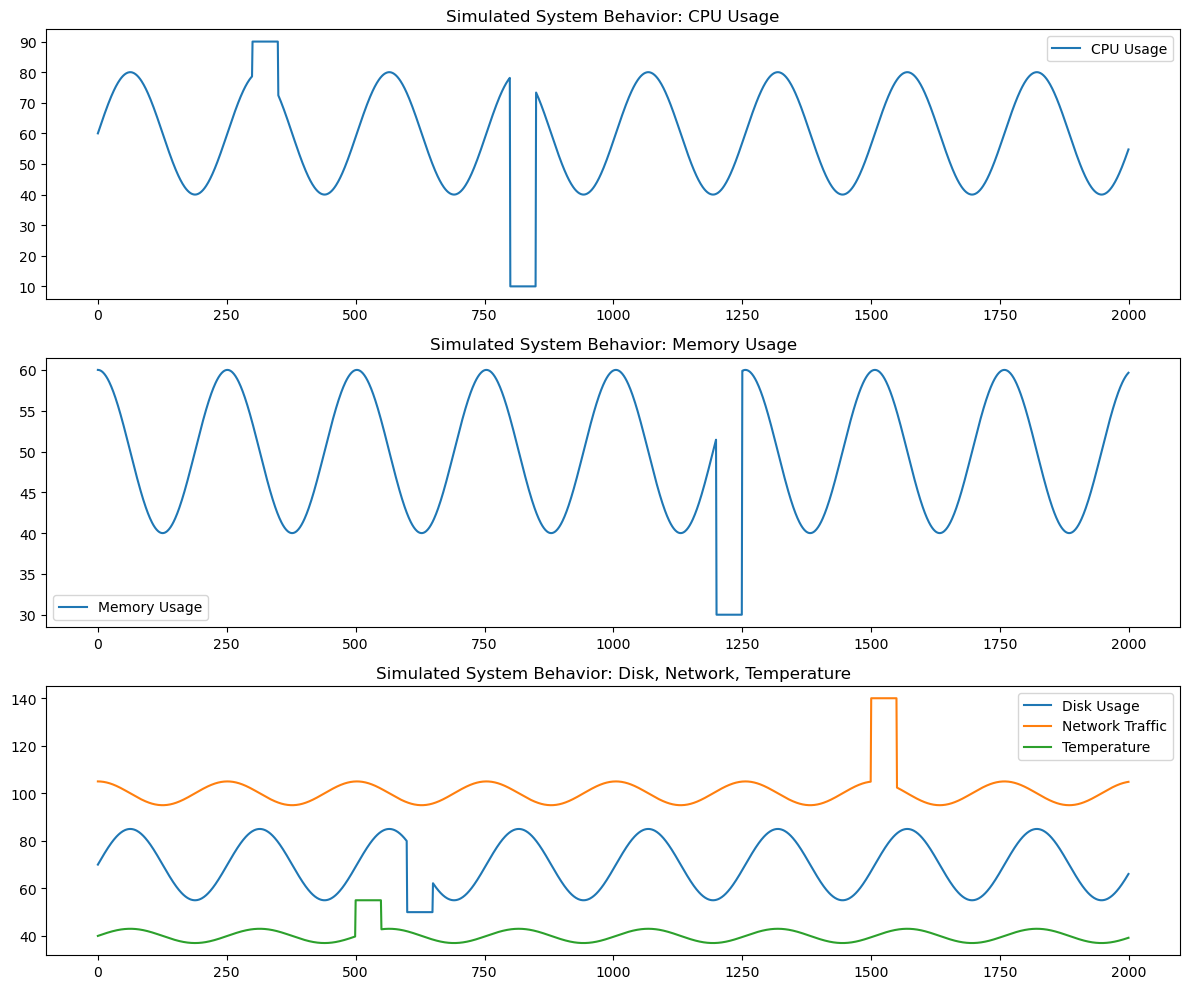

In [5]:
# Plot the data
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.plot(data['CPU'], label="CPU Usage")
plt.title("Simulated System Behavior: CPU Usage")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['Memory'], label="Memory Usage")
plt.title("Simulated System Behavior: Memory Usage")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['Disk'], label="Disk Usage")
plt.plot(data['Network'], label="Network Traffic")
plt.plot(data['Temperature'], label="Temperature")
plt.title("Simulated System Behavior: Disk, Network, Temperature")
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [7]:
# Function to create sequences from the data
def create_sequences(data, seq_length):
    X = []
    Y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])  # Next point in the sequence (multivariate)
    return np.array(X), np.array(Y)

# Parameters
seq_length = 50  # Number of previous time steps to consider
X, Y = create_sequences(data_scaled, seq_length)

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]